In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import rasterio
from rasterio.plot import show
from cartopy import crs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [5]:


# Replace 'lulc_file.tif' and 'rainfall_{month}.tif' with the paths to your LULC and rainfall GeoTIFF files
lulc_path = r'C:\Users\aniru\Machine Learning\Space Hackathon\Group-2\Topic-2\UttarPradesh\LULC\UP_LULC_2012.tif'
rainfall_paths = [r'C:\Users\aniru\Machine Learning\Space Hackathon\Group-2\Topic-2\UttarPradesh\temporal\temporal\2012\UP_Rainfall_2012_1.tif', 
                  r'C:\Users\aniru\Machine Learning\Space Hackathon\Group-2\Topic-2\UttarPradesh\temporal\temporal\2012\UP_Rainfall_2012_2.tif', 
                  r'C:\Users\aniru\Machine Learning\Space Hackathon\Group-2\Topic-2\UttarPradesh\temporal\temporal\2012\UP_Rainfall_2012_3.tif', 
                  r'C:\Users\aniru\Machine Learning\Space Hackathon\Group-2\Topic-2\UttarPradesh\temporal\temporal\2012\UP_Rainfall_2012_4.tif',
                  r'C:\Users\aniru\Machine Learning\Space Hackathon\Group-2\Topic-2\UttarPradesh\temporal\temporal\2012\UP_Rainfall_2012_5.tif', 
                  r'C:\Users\aniru\Machine Learning\Space Hackathon\Group-2\Topic-2\UttarPradesh\temporal\temporal\2012\UP_Rainfall_2012_6.tif', 
                  r'C:\Users\aniru\Machine Learning\Space Hackathon\Group-2\Topic-2\UttarPradesh\temporal\temporal\2012\UP_Rainfall_2012_7.tif', 
                  r'C:\Users\aniru\Machine Learning\Space Hackathon\Group-2\Topic-2\UttarPradesh\temporal\temporal\2012\UP_Rainfall_2012_8.tif',
                  r'C:\Users\aniru\Machine Learning\Space Hackathon\Group-2\Topic-2\UttarPradesh\temporal\temporal\2012\UP_Rainfall_2012_9.tif',
                  r'C:\Users\aniru\Machine Learning\Space Hackathon\Group-2\Topic-2\UttarPradesh\temporal\temporal\2012\UP_Rainfall_2012_10.tif', 
                  r'C:\Users\aniru\Machine Learning\Space Hackathon\Group-2\Topic-2\UttarPradesh\temporal\temporal\2012\UP_Rainfall_2012_11.tif', 
                  r'C:\Users\aniru\Machine Learning\Space Hackathon\Group-2\Topic-2\UttarPradesh\temporal\temporal\2012\UP_Rainfall_2012_12.tif']


In [8]:
# Open LULC GeoTIFF file
with rasterio.open(lulc_path) as lulc_dataset:
    lulc_data = lulc_dataset.read(1)


C:\Users\aniru\AppData\Roaming\Python\Python39\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


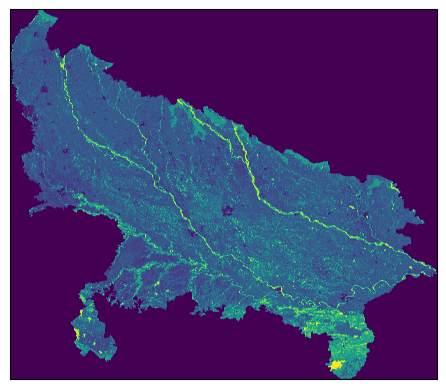

In [9]:
# Create a figure and axis with Cartopy using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': crs.PlateCarree()})
ax.coastlines()

# Plot the initial LULC frame
lulc_im = ax.imshow(lulc_data, extent=(lulc_dataset.bounds.left, lulc_dataset.bounds.right,
                                       lulc_dataset.bounds.bottom, lulc_dataset.bounds.top),
                   origin='upper', cmap='viridis')

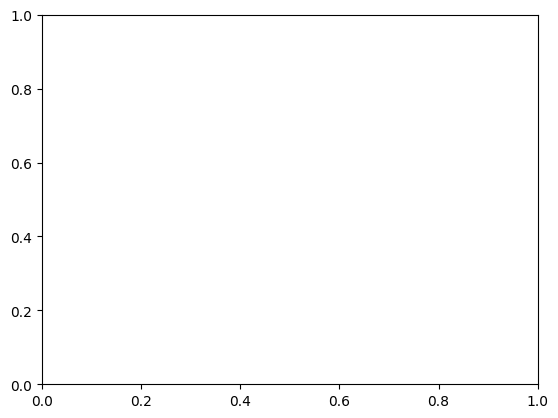

In [10]:
# Add colorbar
lulc_cbar = plt.colorbar(lulc_im, ax=ax, orientation='vertical', fraction=0.05, pad=0.1)
lulc_cbar.set_label('Land Use/Land Cover')

# Add gridlines and labels
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

In [11]:
# Animation update function
def update(frame):
    if frame % 2 == 0:
        # Display LULC map
        lulc_im.set_array(lulc_data)
        ax.set_title('LULC Map')
    else:
        # Display rainfall map for the corresponding month
        month = frame // 2
        with rasterio.open(rainfall_paths[month]) as rainfall_dataset:
            rainfall_data = rainfall_dataset.read(1)
        rainfall_im = ax.imshow(rainfall_data, extent=(rainfall_dataset.bounds.left, rainfall_dataset.bounds.right,
                                                       rainfall_dataset.bounds.bottom, rainfall_dataset.bounds.top),
                                origin='upper', cmap='Blues', alpha=0.7)
        ax.set_title(f'Rainfall for {calendar.month_name[month + 1]}')

    return lulc_im,

In [12]:
ani = animation.FuncAnimation(fig, update, frames=len(rainfall_paths) * 2, interval=200, blit=True)

In [14]:
plt.ion()
plt.show()

In [18]:
ani.save('animation.mp4', writer='ffmpeg', fps=5)


MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4